<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 6</b></center> 

<p>Name: Bhadra Mohitkumar Ajay</p>

<p>Enrollment: 23010101605</p>   
<pre>    

# import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

# Import diabetes.csv data ser using sklearn

In [2]:
data = pd.read_csv('diabetes.csv')

In [5]:
print(data.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627   50      Diabetic  
1                     0.351   31  Non Diabetic  
2                     0.672   32      Diabetic  
3          

# Check the distribution of the target

In [3]:
print("\nTarget Distribution:")
print(data['Outcome'].value_counts(normalize=True))


Target Distribution:
Outcome
Non Diabetic    0.651042
Diabetic        0.348958
Name: proportion, dtype: float64


# Replace zeros with NaN for specific columns

In [6]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    data[column] = data[column].replace(0, np.nan)

# Check for missing values

In [8]:
print("\nMissing Values:: ")
print(data.isnull().sum())


Missing Values:: 
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Fill missing values with median

In [9]:
for column in columns_to_check:
    data[column].fillna(data[column].median(), inplace=True)

C:\Users\Jay Ashapura Maa\AppData\Local\Temp\ipykernel_19620\194875791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\Jay Ashapura Maa\AppData\Local\Temp\ipykernel_19620\194875791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

# Visualize Distributions

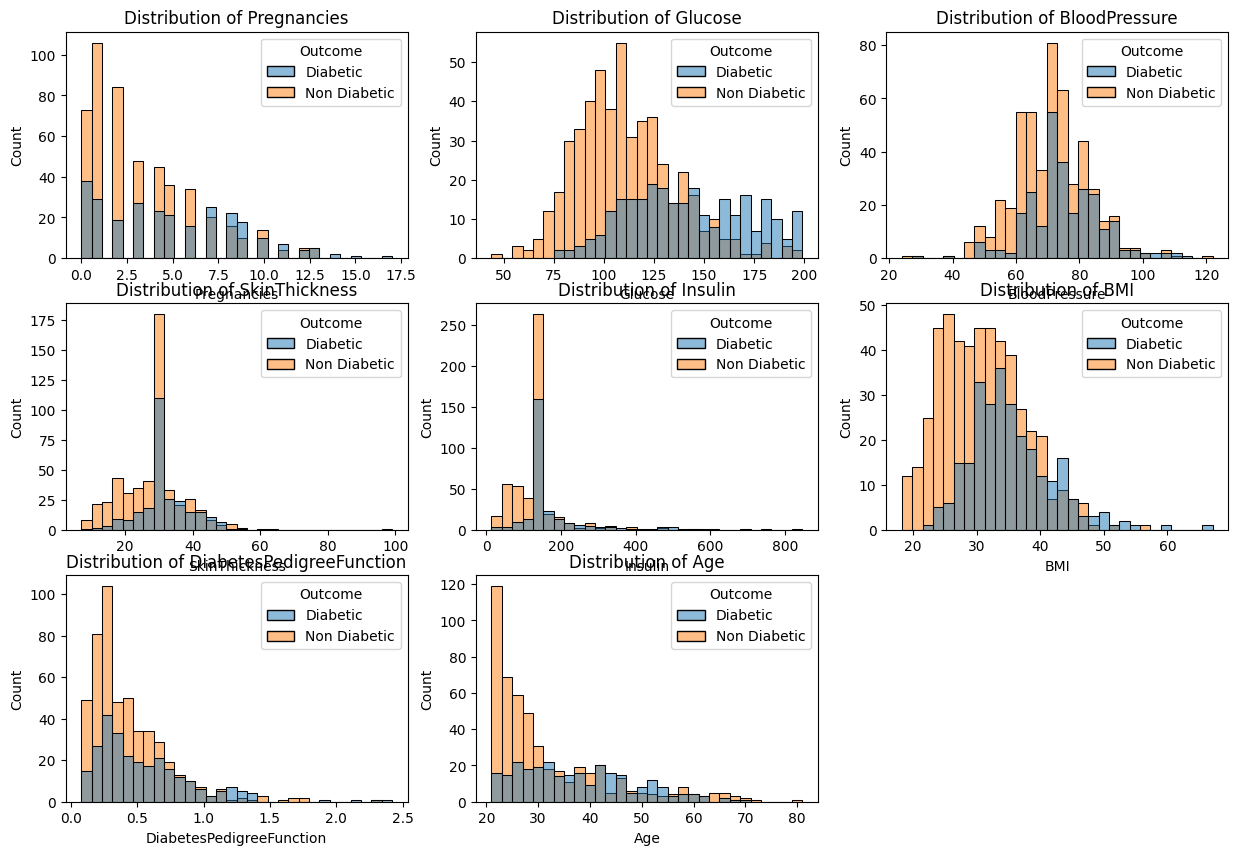

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=column, hue='Outcome', bins=30)
    plt.title(f'Distribution of {column}')


In [17]:
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.close()

# Convert Targer data into interger code

In [44]:
X = data.drop('Outcome', axis=1)

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# Divide the data into input and output

In [42]:
y = data['Outcome']

In [43]:
print(y)

0          Diabetic
1      Non Diabetic
2          Diabetic
3      Non Diabetic
4          Diabetic
           ...     
763    Non Diabetic
764    Non Diabetic
765    Non Diabetic
766        Diabetic
767    Non Diabetic
Name: Outcome, Length: 768, dtype: object


# Splitting the dataset into the Training set and Test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Model

In [20]:
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fitting DecisionTreeClassifier   on dataset

In [21]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Display Decision Tree

In [27]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Non Diabetic', 'Diabetic'], 
          filled=True, rounded=True)
plt.savefig('decision_tree.png')
plt.close()

# Predict the x_test 

In [28]:
y_pred = dt_classifier.predict(X_test)

# Display Training Accuracy

In [30]:
train_accuracy = dt_classifier.score(X_train, y_train)
print(train_accuracy)

1.0


# Display Test Accuracy

In [31]:
test_accuracy = dt_classifier.score(X_test, y_test)
print(test_accuracy)

0.7207792207792207


# Confusion Matrix

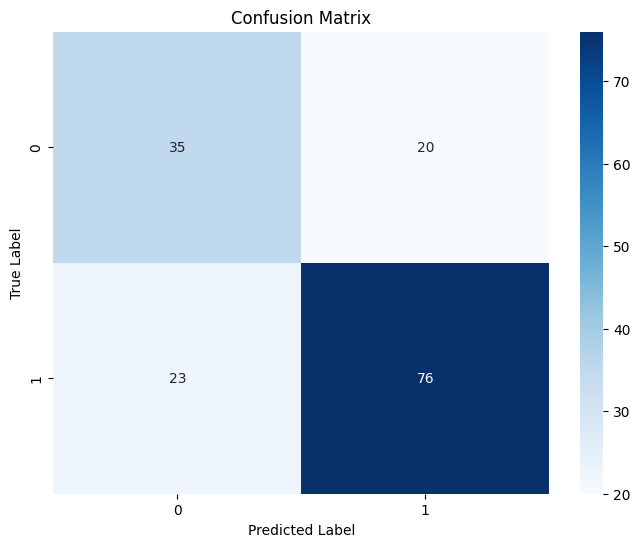

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')

# Save Model State

In [38]:
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)

# Load Model from Disk

In [39]:
with open('diabetes_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [40]:
test_accuracy_loaded = loaded_model.score(X_test, y_test)
print(f"\nLoaded Model Test Accuracy: {test_accuracy_loaded:.4f}")


Loaded Model Test Accuracy: 0.7208


In [41]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Feature Importance:
                    feature  importance
1                   Glucose    0.357487
5                       BMI    0.164377
7                       Age    0.131524
6  DiabetesPedigreeFunction    0.115416
4                   Insulin    0.087381
2             BloodPressure    0.079928
3             SkinThickness    0.035927
0               Pregnancies    0.027960
